#`rioxarray`

`rioxarray`:

- is a Python ectension for `xarray` to manipulate `xarray.DataArray`'s as rasters
- means *raster input/output +xarray*

## Data
Raster files from the US Natuional Agriculture Imagery Program (NAIP)

- high-resolution aerial images with four spectral bands: Red, Green, Blue and Near-infrared (NIR)
- pre-process of the data to separate the RGB bands from the NIR band and clipped a scene

## Import .tif

In [36]:
import os # to work with file paths
import numpy as no
import matplotlib.pyplot as plt

import rioxarray as rioxr

import geopandas as gpd
from shapely.geometry import Polygon

There are multiple ways of opening a .tif file using `xarray` or `rioxarray`

Use `rioxarray.open_rasterio()` function to open the ‘.tif’ file:

In [9]:
#load NIR tif file

#create file path
nir_fp = os.path.join(os.getcwd(),'data','nir.tif')
nir = rioxr.open_rasterio(nir_fp)
nir

<xarray.DataArray (band: 1, y: 3208, x: 2419)>
[7760152 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 2.512e+05 2.512e+05 ... 2.527e+05 2.527e+05
  * y            (y) float64 3.813e+06 3.813e+06 ... 3.811e+06 3.811e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [11]:
#get current working directory
os.getcwd()

'/Users/p_park/eds220-week6'

## `xr.DataArray` exploration

Let's verify we loaded an `xarray.DataArray

In [12]:
type(nir)

xarray.core.dataarray.DataArray

In [13]:
#access some attributes
print('shape:', nir.shape)
print('data type:', nir.dtype)

shape: (1, 3208, 2419)
data type: uint8


In [15]:
# check values of array at the corners
print(nir.values)
nir.values

[[[167 164 161 ... 147 152 151]
  [170 170 168 ... 151 149 154]
  [176 177 177 ... 151 151 151]
  ...
  [ 94  88 101 ...  83  88  79]
  [108  95 103 ...  92  91  75]
  [ 94  90 104 ...  87  88  82]]]


array([[[167, 164, 161, ..., 147, 152, 151],
        [170, 170, 168, ..., 151, 149, 154],
        [176, 177, 177, ..., 151, 151, 151],
        ...,
        [ 94,  88, 101, ...,  83,  88,  79],
        [108,  95, 103, ...,  92,  91,  75],
        [ 94,  90, 104, ...,  87,  88,  82]]], dtype=uint8)

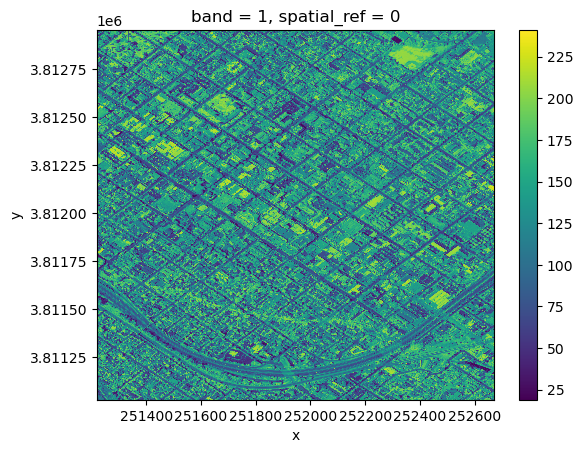

In [17]:
#exploritory plot
nir.plot()

## `rio` accessor

An **accessor** in Python let’s us access a different set of properties of an object

use the `.rio` accessor for `xarray.DataArrays` to access its raster properties

**Example**

In [20]:
print('# bands:', nir.rio.count)
print('height:', nir.rio.height)
print('width:', nir.rio.width)
print('resolution:', nir.rio.resolution())
print('no data values:', nir.rio.nodata, '\n')

print('spatial bounding box:')
print(nir.rio.bounds(), '\n')

print('CRS:', nir.rio.crs)

# bands: 1
height: 3208
width: 2419
resolution: (0.6000000000000072, -0.600000000000058)
no data values: None 

spatial bounding box:
(251218.8, 3811027.2, 252670.19999999998, 3812952.0) 

CRS: EPSG:26911


## Multi-band raster

In [25]:
#open RBG raster
rgb_fp = os.path.join(os.getcwd(),'data','rgb.tif')
rgb = rioxr.open_rasterio(rgb_fp)
rgb

<xarray.DataArray (band: 3, y: 3208, x: 2419)>
[23280456 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 2.512e+05 2.512e+05 ... 2.527e+05 2.527e+05
  * y            (y) float64 3.813e+06 3.813e+06 ... 3.811e+06 3.811e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [27]:
print('rgb shape: ', rgb.shape)
print('rgb #bands: ', rgb.rio.count)

rgb shape:  (3, 3208, 2419)
rgb #bands:  3


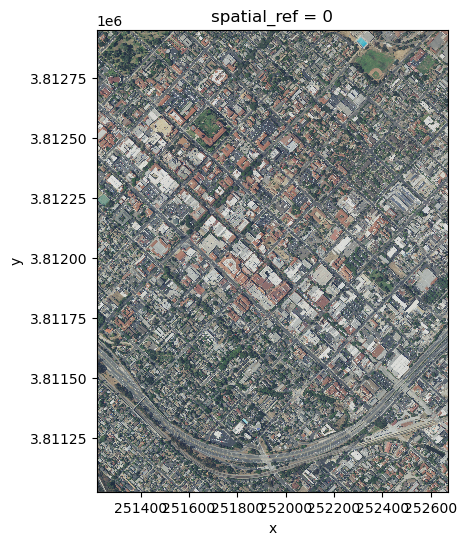

In [29]:
#parameters for plotting this raster
size = 6 #height of figure in inches
aspect = rgb.rio.width / rgb.rio.height # ratio width/height

#plot three bands as RGB image
rgb.plot.imshow(size = size, aspect = aspect)

## Box for clipping

Our area of interest (aoi) for this lesson is a smaller region that includes only a few blocks around the NCEAS building


In [56]:
#list of vertices of our aoi box
#points = [[-119.70371835873206,34.42421334076131],
#[-119.70371835873206,34.4159475956815],
#[-119.69475541455574,34.4159475956815],
#[-119.69475541455574,34.42421334076131],
#[-119.70371835873206,34.42421334076131]]

points = [[-119.69855660152982,34.41946126104733],
[-119.69855660152982,34.418664070563054],
[-119.6975966652731,34.418664070563054],
[-119.6975966652731,34.41946126104733],
[-119.69855660152982,34.41946126104733]]

In [57]:
#create a geodataframe with aoi
aoi = gpd.GeoDataFrame(geometry =[Polygon(points)],
                       crs = 'epsg:4326')
aoi

,geometry
0,"POLYGON ((-119.69856 34.41946, -119.69856 34.4..."


<AxesSubplot:>

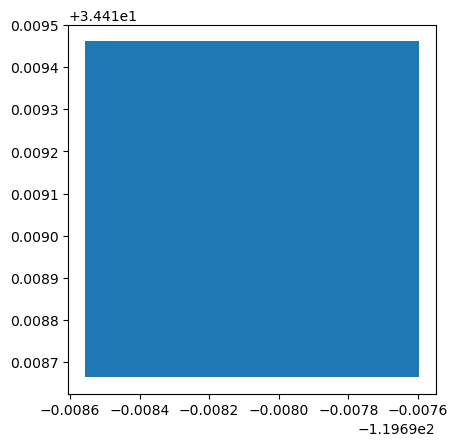

In [58]:
aoi.plot()

## Clip raster

Remember: **if two geospatial sets will interact they need to be in the same CRS.**

Check:

In [59]:
print('aoi:', aoi.crs)
print('nir: CRS', nir.rio.crs)
print('rgb CRS:', rgb.rio.crs)

aoi: epsg:4326
nir: CRS EPSG:26911
rgb CRS: EPSG:26911


In [60]:
#reproject aoi to rgb crs
aoi = aoi.to_crs(rgb.rio.crs)
print('matched crs?', aoi.crs == rgb.rio.crs)
aoi.crs

matched crs? True


<Bound CRS: PROJCS["NAD83 / UTM zone 11N",GEOGCS["NAD83",DATUM ...>
Name: NAD83 / UTM zone 11N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from NAD83 to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: NAD83 / UTM zone 11N

<AxesSubplot:title={'center':'spatial_ref = 0'}, xlabel='x', ylabel='y'>

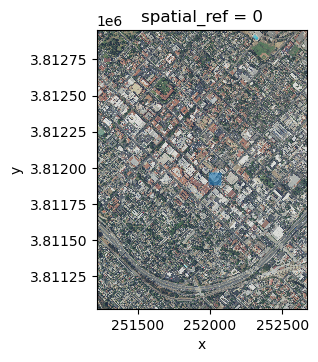

In [61]:
#plot aoi outline and RGB raster together
fig, ax = plt.subplots()
fig.set_size_inches((size, size*aspect)) #cannot use ax and size, aspect together
rgb.plot.imshow(ax=ax)
aoi.plot(ax = ax, alpha = 0.6)

To clip the raster using the aoi polygon we use the `.rio.clip_box()` method:

In [62]:
#clip raster to aoi
rgb_small = rgb.rio.clip_box(*aoi.total_bounds)
nir_small = nir.rio.clip_box(*aoi.total_bounds)

In [63]:
#check shape update
print('original shape: ', rgb.shape)
print('reduced shape: ', rgb_small.shape)

original shape:  (3, 3208, 2419)
reduced shape:  (3, 153, 152)


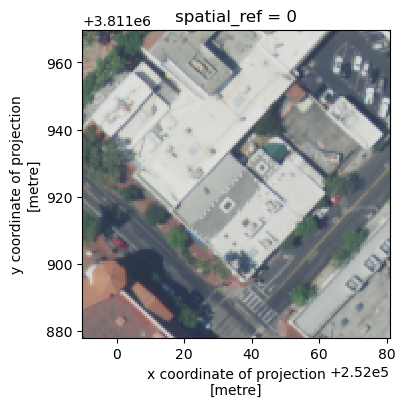

In [65]:
#plot with correct size
size = 4
aspect = rgb_small.rio.width/ rgb_small.rio.height
rgb_small.plot.imshow(size = size, aspect = aspect)